 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, low_memory=False).sort_values("Date")
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace=True)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, low_memory=False).sort_values("Date")
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace=True)
algo_df.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, low_memory=False).sort_values("Date")
sp500_df['Close'] = sp500_df['Close'].str.replace('$','').astype(float)
sp500_df.head()

,Date,Close
1526,1-Apr-13,1562.17
1273,1-Apr-14,1885.52
1021,1-Apr-15,2059.69
769,1-Apr-16,2072.78
15,1-Apr-19,2867.19


In [9]:
# Check Data Types
# YOUR CODE HERE
whale_df.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [10]:
algo_df.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [11]:
sp500_df.dtypes

Date      object
Close    float64
dtype: object

In [12]:
# Fix Data Types
# YOUR CODE HERE
whale_dts = pd.to_datetime(whale_df['Date'])
whale_dti = pd.DatetimeIndex(whale_dts.values)
whale_df_time_index = whale_df.set_index(whale_dti)
whale_df_time_index.drop('Date',axis=1,inplace=True)
whale_df_time_index.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [13]:
whale_df_time_index.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [14]:
algo_dts = pd.to_datetime(algo_df['Date'])
algo_dti = pd.DatetimeIndex(algo_dts.values)
algo_df_time_index = algo_df.set_index(algo_dti)
algo_df_time_index.drop('Date',axis=1,inplace=True)
algo_df_time_index.head()

,Algo 1,Algo 2
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [15]:
sp500_dts = pd.to_datetime(sp500_df['Date'])
sp500_dti = pd.DatetimeIndex(sp500_dts.values)
sp500_df_time_index = sp500_df.set_index(sp500_dti)
sp500_df_time_index.drop('Date',axis=1,inplace=True)
sp500_df_time_index.sort_index().head()

,Close
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [16]:
sp500_df_time_index.dtypes

Close    float64
dtype: object

In [17]:
# Calculate Daily Returns
# YOUR CODE HERE
whale_daily_returns = whale_df_time_index.sort_index()
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [18]:
whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [19]:
algo_daily_returns = algo_df_time_index.sort_index()
algo_daily_returns.head()

,Algo 1,Algo 2
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [20]:
sp500_daily_returns = sp500_df_time_index.sort_index().pct_change()
sp500_daily_returns.head()

,Close
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [21]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns.dropna(inplace=True)

In [22]:
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [23]:
# Rename Column
# YOUR CODE HERE
sp500_daily_returns.columns =['S&P500']
sp500_daily_returns.head()

,S&P500
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [128]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_returns = pd.concat([whale_daily_returns, algo_daily_returns, sp500_daily_returns], axis="columns", join="inner").sort_index()
combined_returns.dropna(inplace=True)
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075
2015-03-16,0.007901,0.003583,0.007953,0.008055,-0.003395,0.004117,0.013534


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

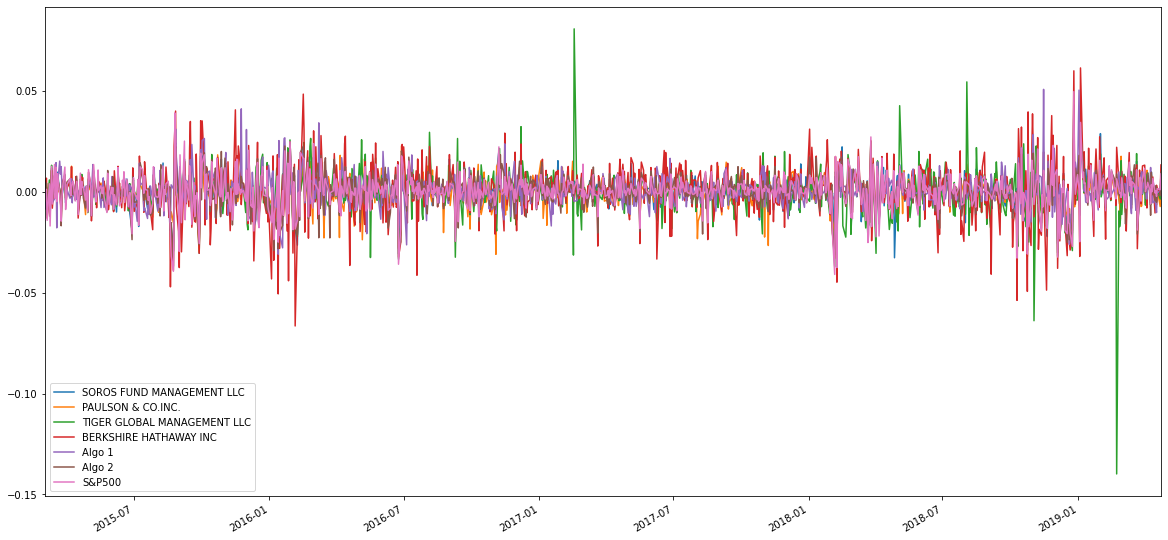

In [25]:
# Plot daily returns
# YOUR CODE HERE
combined_returns.plot(figsize=(20,10))

In [26]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_returns).cumprod().sort_index()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


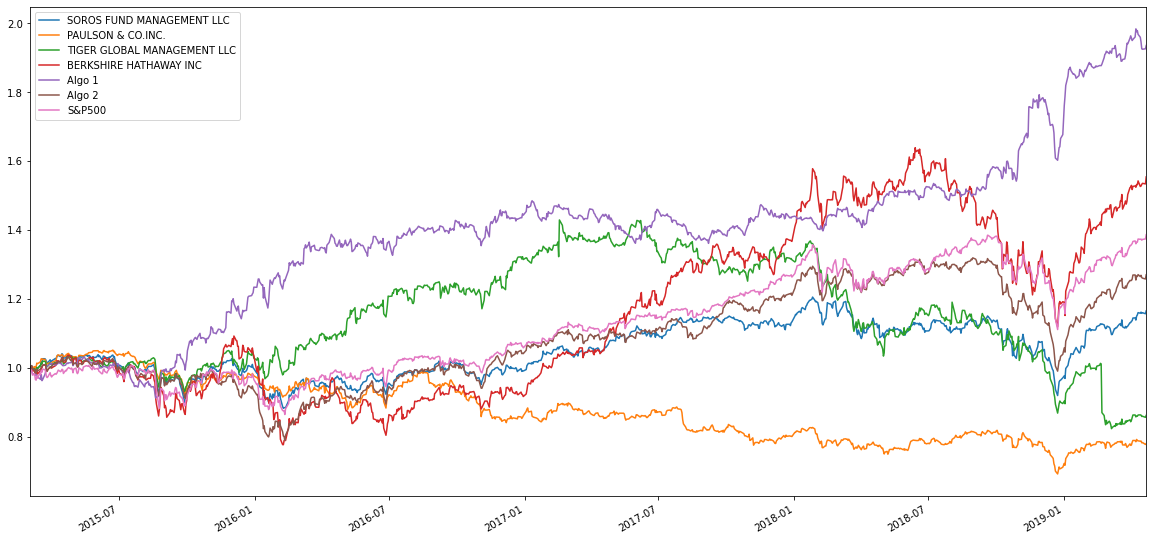

In [27]:
cumulative_returns.plot(figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

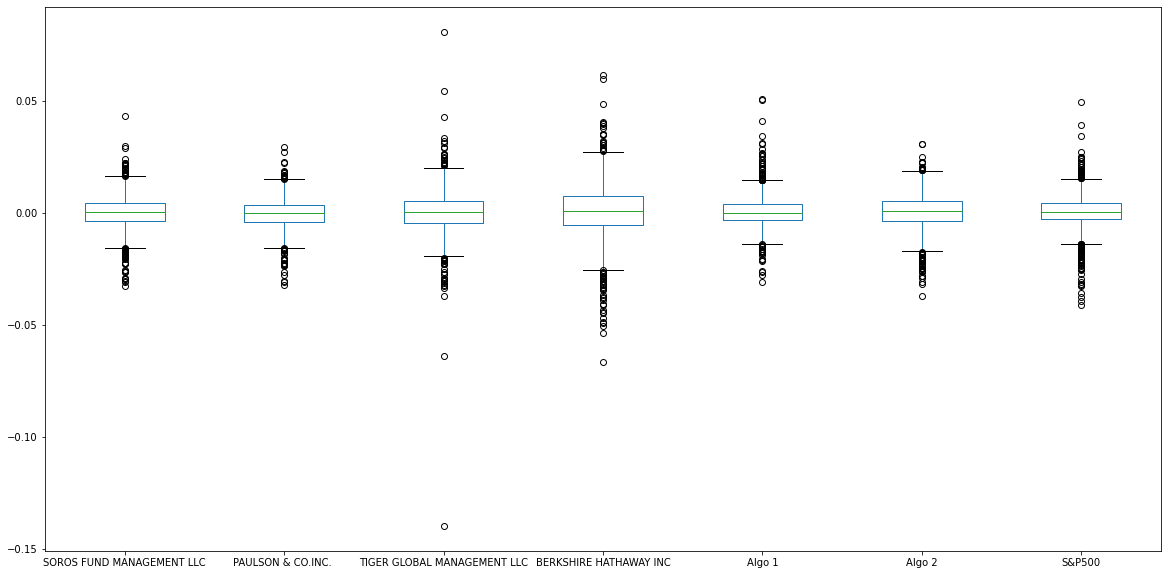

In [28]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_returns.plot(figsize=(20,10),kind='box')

In [29]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

In [30]:
type(daily_std)

pandas.core.series.Series

In [31]:
daily_std.index

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P500'],
      dtype='object')

In [32]:
daily_std.values

array([0.00789537, 0.00702308, 0.01089397, 0.01291862, 0.0076202 ,
       0.00834227, 0.00855373])

In [33]:
daily_std.get(key = 'S&P500')

0.008553731597758204

In [34]:
daily_std[daily_std == daily_std.get(key = 'S&P500')].index[0]

'S&P500'

In [35]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
for portfolio in daily_std.values:
    if portfolio > daily_std.get(key = 'S&P500'):
        port_name = daily_std[daily_std == portfolio].index[0]
        print(f"{port_name} is riskier than the S&P 500.")
    else:
        port_name = daily_std[daily_std == portfolio].index[0]
        print(f"{port_name} is not riskier than the S&P 500.") 


SOROS FUND MANAGEMENT LLC is not riskier than the S&P 500.
PAULSON & CO.INC.  is not riskier than the S&P 500.
TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P 500.
BERKSHIRE HATHAWAY INC is riskier than the S&P 500.
Algo 1 is not riskier than the S&P 500.
Algo 2 is not riskier than the S&P 500.
S&P500 is not riskier than the S&P 500.


In [36]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annual_std = combined_returns.std()* np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

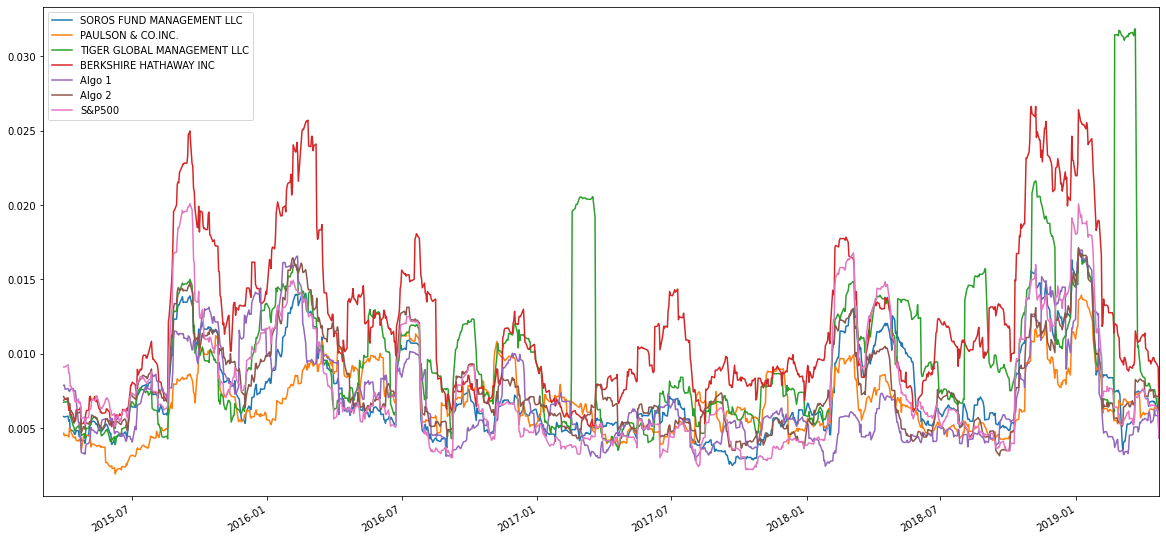

In [37]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_returns.rolling(window=21).std().plot(figsize=(20,10))

In [38]:
# Construct a correlation table
# YOUR CODE HERE
correlation = combined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


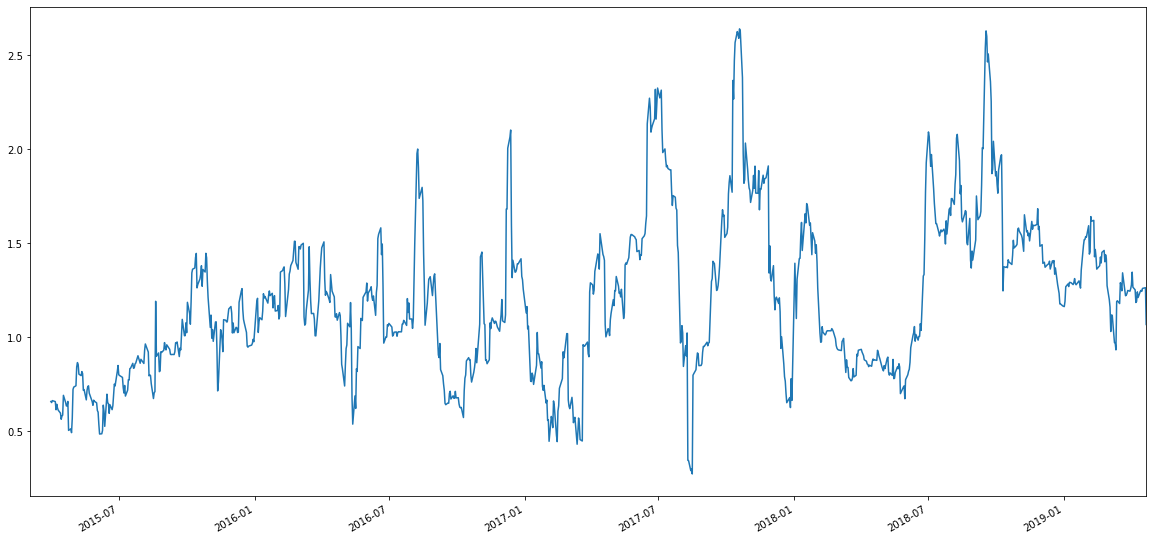

In [39]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
covariance = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_returns['S&P500'])
#covariance
variance = combined_returns['S&P500'].rolling(window=21).var()
#variance
BH_beta = covariance / variance
BH_beta.plot(figsize=(20,10))

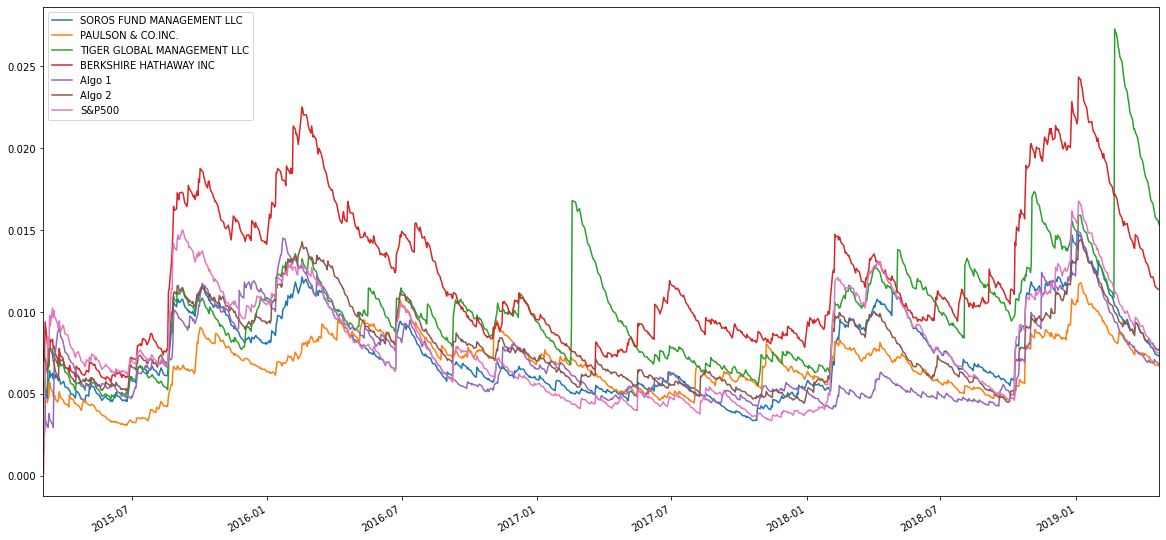

In [69]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
ema21 = combined_returns.ewm(halflife=21).std().plot(figsize=(20,10))
ema21

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [41]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_returns.mean() * 252) / (daily_std * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

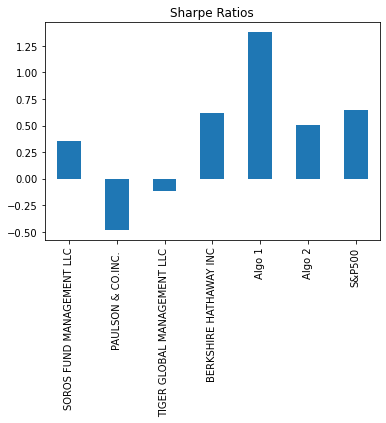

In [42]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot.bar(title='Sharpe Ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [84]:
# Read the first stock
# YOUR CODE HERE
GOOG_returns_csv = Path("Resources/GOOG_sheet.csv")
GOOG_df = pd.read_csv(GOOG_returns_csv, low_memory=False).sort_values("Date")
GOOG_df.head()

,Symbol,Date,Close
469,GOOG,1/10/2017,804.79
721,GOOG,1/10/2018,1102.61
972,GOOG,1/10/2019,1070.33
217,GOOG,1/11/2016,716.03
470,GOOG,1/11/2017,807.91


In [82]:
# Read the second stock
# YOUR CODE HERE
AAPL_returns_csv = Path("Resources/AAPL_sheet.csv")
AAPL_df = pd.read_csv(AAPL_returns_csv, low_memory=False).sort_values("Date")
AAPL_df.head()

,AAPL,Date,Close
469,AAPL,1/10/2017,119.11
721,AAPL,1/10/2018,174.29
972,AAPL,1/10/2019,153.80
217,AAPL,1/11/2016,98.53
470,AAPL,1/11/2017,119.75


In [83]:
# Read the third stock
# YOUR CODE HERE
TSLA_returns_csv = Path("Resources/TSLA_sheet.csv")
TSLA_df = pd.read_csv(TSLA_returns_csv, low_memory=False).sort_values("Date")
TSLA_df.head()

,TSLA,Date,Close
469,TSLA,1/10/2017,229.87
721,TSLA,1/10/2018,334.80
972,TSLA,1/10/2019,344.97
217,TSLA,1/11/2016,207.85
470,TSLA,1/11/2017,229.73


In [95]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
GOOG_dts = pd.to_datetime(GOOG_df['Date'])
GOOG_dti = pd.DatetimeIndex(GOOG_dts.values)
GOOG_df_time_index = GOOG_df.set_index(GOOG_dti)
GOOG_df_time_index.drop('Date',axis=1,inplace=True)
GOOG_df_time_index.sort_index().head()

,Symbol,Close
2015-03-03,GOOG,572.07
2015-03-04,GOOG,571.80
2015-03-05,GOOG,573.76
2015-03-06,GOOG,566.13
2015-03-09,GOOG,567.29


In [94]:
AAPL_dts = pd.to_datetime(AAPL_df['Date'])
AAPL_dti = pd.DatetimeIndex(AAPL_dts.values)
AAPL_df_time_index = AAPL_df.set_index(AAPL_dti)
AAPL_df_time_index.drop('Date',axis=1,inplace=True)
AAPL_df_time_index.sort_index().head()

,AAPL,Close
2015-03-03,AAPL,129.36
2015-03-04,AAPL,128.54
2015-03-05,AAPL,126.41
2015-03-06,AAPL,126.60
2015-03-09,AAPL,127.14


In [93]:
TSLA_dts = pd.to_datetime(TSLA_df['Date'])
TSLA_dti = pd.DatetimeIndex(TSLA_dts.values)
TSLA_df_time_index = TSLA_df.set_index(TSLA_dti)
TSLA_df_time_index.drop('Date',axis=1,inplace=True)
TSLA_df_time_index.sort_index().head()

,TSLA,Close
2015-03-03,TSLA,199.56
2015-03-04,TSLA,202.44
2015-03-05,TSLA,200.63
2015-03-06,TSLA,193.88
2015-03-09,TSLA,190.88


In [109]:
new_portfolio = pd.concat([GOOG_df_time_index, AAPL_df_time_index, TSLA_df_time_index], axis="columns", join="inner").sort_index()
new_portfolio.dropna(inplace=True)
new_portfolio.head()

,Symbol,Close,AAPL,Close,TSLA,Close
2015-03-03,GOOG,572.07,AAPL,129.36,TSLA,199.56
2015-03-04,GOOG,571.80,AAPL,128.54,TSLA,202.44
2015-03-05,GOOG,573.76,AAPL,126.41,TSLA,200.63
2015-03-06,GOOG,566.13,AAPL,126.60,TSLA,193.88
2015-03-09,GOOG,567.29,AAPL,127.14,TSLA,190.88


In [110]:
# Reset the index
# YOUR CODE HERE
#Already done

In [111]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
new_portfolio.drop(columns='Symbol', inplace=True)
new_portfolio.drop(columns='AAPL', inplace=True)
new_portfolio.drop(columns='TSLA', inplace=True)
new_portfolio.columns =['GOOG','AAPL','TSLA']
new_portfolio.head()

,GOOG,AAPL,TSLA
2015-03-03,572.07,129.36,199.56
2015-03-04,571.80,128.54,202.44
2015-03-05,573.76,126.41,200.63
2015-03-06,566.13,126.60,193.88
2015-03-09,567.29,127.14,190.88


In [112]:
# Drop Nulls
# YOUR CODE HERE
new_portfolio.isnull().sum()

GOOG    0
AAPL    0
TSLA    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [143]:
# Calculate weighted portfolio returns
#weights = [1/3, 1/3, 1/3]
weight = (1/3)
# YOUR CODE HERE
np_returns = new_portfolio.sort_index().pct_change()
weighted_np_returns = weight * np_returns["GOOG"] + weight * np_returns["AAPL"] + weight * np_returns["TSLA"]
weighted_np_returns.head()

2015-03-03         NaN
2015-03-04    0.002540
2015-03-05   -0.007361
2015-03-06   -0.015146
2015-03-09   -0.003053
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [154]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_returns = pd.concat([combined_returns, weighted_np_returns], axis="columns", join="inner").sort_index()
all_returns.dropna(inplace=True)
all_returns.columns =['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','S&P500','Perry']
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Perry
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.002540
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.007361
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.015146
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.003053
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.015982


In [155]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_returns.dropna(inplace=True)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [156]:
# Risk
# YOUR CODE HERE
daily2_std = all_returns.std()
daily2_std

SOROS FUND MANAGEMENT LLC      0.007897
PAULSON & CO.INC.              0.007027
TIGER GLOBAL MANAGEMENT LLC    0.010898
BERKSHIRE HATHAWAY INC         0.012917
Algo 1                         0.007622
Algo 2                         0.008341
S&P500                         0.008552
Perry                          0.014953
dtype: float64

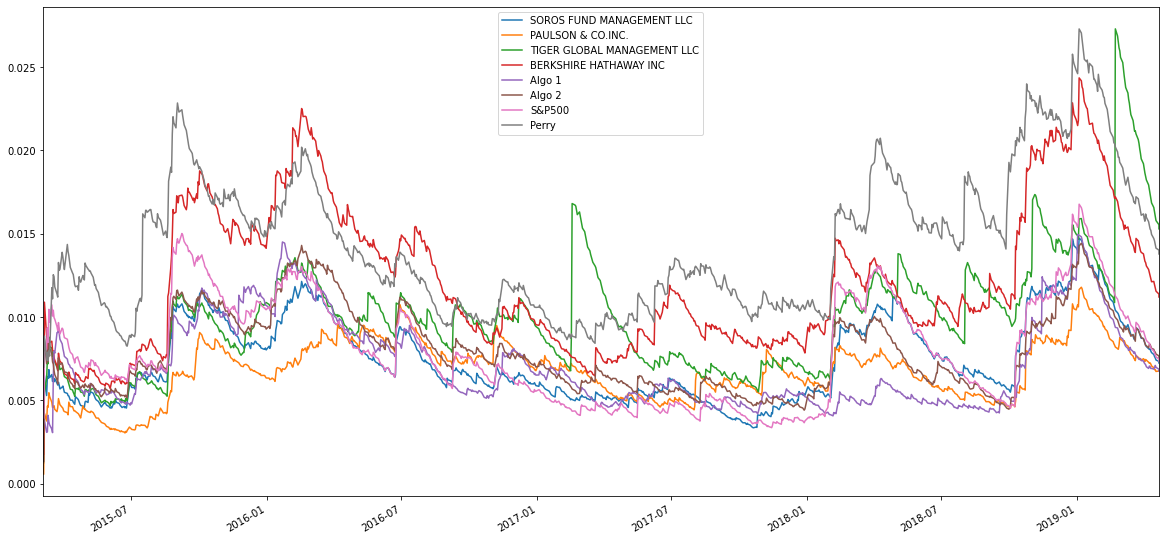

In [157]:
# Rolling
# YOUR CODE HERE
ema21_2 = all_returns.ewm(halflife=21).std().plot(figsize=(20,10))
ema21_2

In [158]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios2 = (all_returns.mean() * 252) / (daily2_std * np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC      0.340332
PAULSON & CO.INC.             -0.496388
TIGER GLOBAL MANAGEMENT LLC   -0.134576
BERKSHIRE HATHAWAY INC         0.613290
Algo 1                         1.374900
Algo 2                         0.482522
S&P500                         0.643124
Perry                          0.734499
dtype: float64

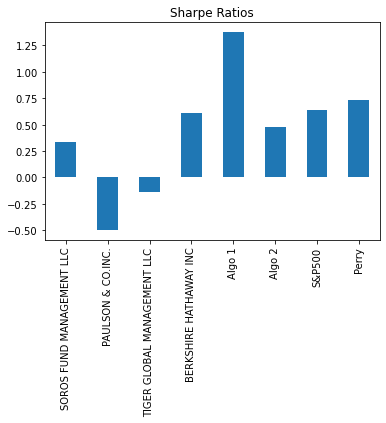

In [159]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios2.plot.bar(title='Sharpe Ratios')

In [160]:
# Create a correlation analysis
# YOUR CODE HERE
correlation2 = all_returns.corr()
correlation2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Perry
SOROS FUND MANAGEMENT LLC,1.000000,0.699824,0.561091,0.754173,0.320845,0.826738,0.837698,0.601756
PAULSON & CO.INC.,0.699824,1.000000,0.434461,0.545141,0.268349,0.678046,0.669109,0.452747
TIGER GLOBAL MANAGEMENT LLC,0.561091,0.434461,1.000000,0.424180,0.164102,0.507200,0.623795,0.427384
BERKSHIRE HATHAWAY INC,0.754173,0.545141,0.424180,1.000000,0.291555,0.687789,0.751046,0.659164
Algo 1,0.320845,0.268349,0.164102,0.291555,1.000000,0.287813,0.279002,0.221532
Algo 2,0.826738,0.678046,0.507200,0.687789,0.287813,1.000000,0.858633,0.581913
S&P500,0.837698,0.669109,0.623795,0.751046,0.279002,0.858633,1.000000,0.700079
Perry,0.601756,0.452747,0.427384,0.659164,0.221532,0.581913,0.700079,1.000000


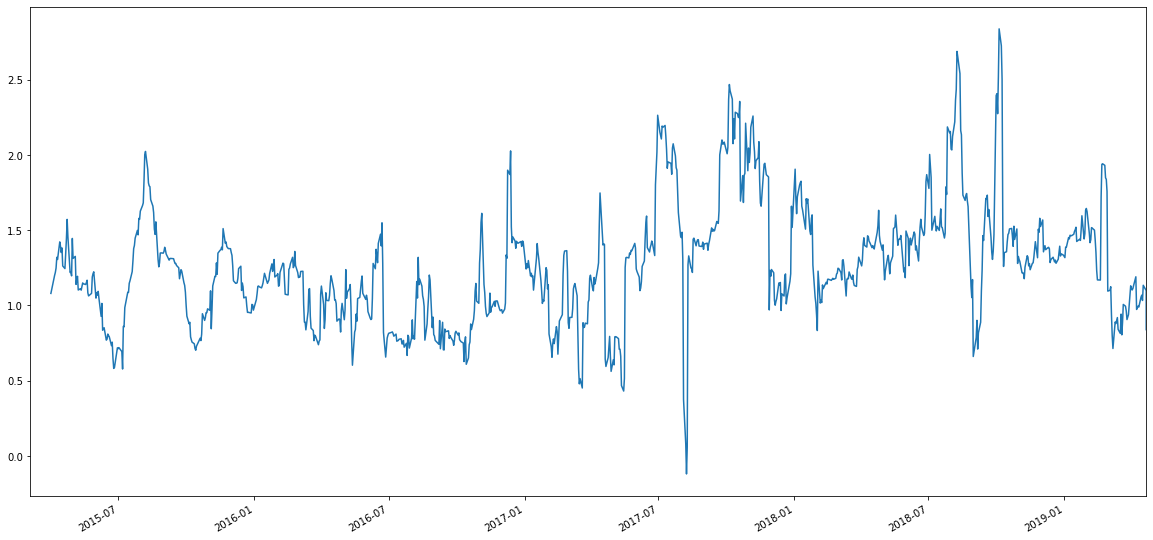

In [161]:
# Beta
# YOUR CODE HERE
covariance_2 = all_returns['Perry'].rolling(window=21).cov(all_returns['S&P500'])
variance_2 = all_returns['S&P500'].rolling(window=21).var()
BH_beta_2 = covariance_2 / variance_2
BH_beta_2.plot(figsize=(20,10))